### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

#### Import Library

#### Data load

In [64]:
# import scikit-learn
from sklearn.datasets import load_iris # datasets of iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [65]:
iris = load_iris()

#### Pandas

In [66]:
import pandas as pd

In [67]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target_df = pd.DataFrame(iris.target, columns=['types'])

In [68]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
iris_target_df.head()

,types
0,0
1,0
2,0
3,0
4,0


In [70]:
iris_all_df = pd.concat([iris_df, iris_target_df], axis=1)

In [71]:
iris_all_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),types
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [72]:
iris_all_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),types
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [73]:
explain_train, explain_test, target_train, target_test = train_test_split(iris_df, iris_target_df, test_size=0.33)

In [74]:
explain_train.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
134,6.1,2.6,5.6,1.4
123,6.3,2.7,4.9,1.8
29,4.7,3.2,1.6,0.2
146,6.3,2.5,5.0,1.9
67,5.8,2.7,4.1,1.0
9,4.9,3.1,1.5,0.1
6,4.6,3.4,1.4,0.3
94,5.6,2.7,4.2,1.3
149,5.9,3.0,5.1,1.8
148,6.2,3.4,5.4,2.3


In [75]:
explain_test.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,6.5,2.8,4.6,1.5
42,4.4,3.2,1.3,0.2
31,5.4,3.4,1.5,0.4
38,4.4,3.0,1.3,0.2
117,7.7,3.8,6.7,2.2
66,5.6,3.0,4.5,1.5
65,6.7,3.1,4.4,1.4
86,6.7,3.1,4.7,1.5
122,7.7,2.8,6.7,2.0
59,5.2,2.7,3.9,1.4


In [76]:
target_train.head(10)

,types
134,2
123,2
29,0
146,2
67,1
9,0
6,0
94,1
149,2
148,2


In [77]:
target_test.head(10)

,types
54,1
42,0
31,0
38,0
117,2
66,1
65,1
86,1
122,2
59,1


In [78]:
explain_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.000000,100.000000,100.000000
mean,5.842000,3.058000,3.738000,1.199000
std,0.814289,0.448832,1.773416,0.771918
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.700000,1.575000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
explain_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.846000,3.056000,3.798000,1.200000
std,0.863361,0.413131,1.766178,0.750238
min,4.400000,2.000000,1.300000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.250000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.700000,4.100000,6.700000,2.400000


#### Data Visialization

In [80]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### petal(がく片)

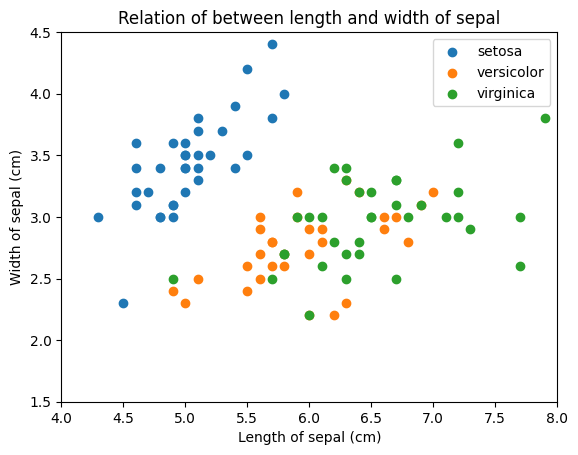

In [81]:
plt.scatter(
    explain_train[target_train["types"]==0]["sepal length (cm)"],
    explain_train[target_train["types"]==0]["sepal width (cm)"],
    label="setosa",
    cmap="rgb"
)
plt.scatter(
    explain_train[target_train["types"]==1]["sepal length (cm)"],
    explain_train[target_train["types"]==1]["sepal width (cm)"],
    label="versicolor",
    cmap="rgb"
)
plt.scatter(
    explain_train[target_train["types"]==2]["sepal length (cm)"],
    explain_train[target_train["types"]==2]["sepal width (cm)"],
    label="virginica",
    cmap="rgb"
)

plt.xlim(4, 8)
plt.ylim(1.5, 4.5)

plt.xlabel('Length of sepal (cm)')
plt.ylabel('Width of sepal (cm)')

plt.title('Relation of between length and width of sepal')
plt.legend()

##### petal(花びら)

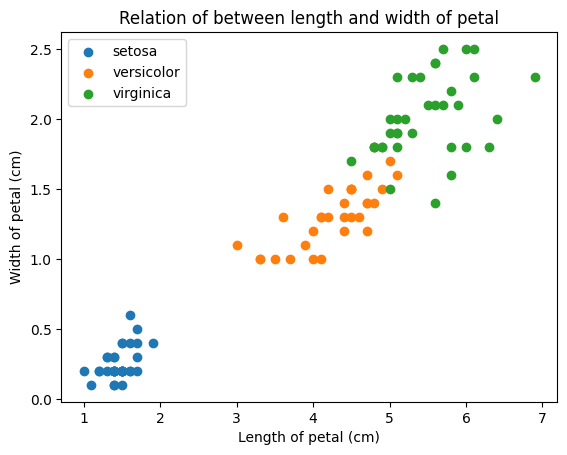

In [82]:
plt.scatter(
    explain_train[target_train["types"]==0]["petal length (cm)"],
    explain_train[target_train["types"]==0]["petal width (cm)"],
    label="setosa",
    cmap="rgb"
)
plt.scatter(
    explain_train[target_train["types"]==1]["petal length (cm)"],
    explain_train[target_train["types"]==1]["petal width (cm)"],
    label="versicolor",
    cmap="rgb"
)
plt.scatter(
    explain_train[target_train["types"]==2]["petal length (cm)"],
    explain_train[target_train["types"]==2]["petal width (cm)"],
    label="virginica",
    cmap="rgb"
)

plt.xlabel('Length of petal (cm)')
plt.ylabel('Width of petal (cm)')

plt.title('Relation of between length and width of petal')
plt.legend()

#### Train model

In [83]:
sepal_df_train = explain_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
petal_df_train = explain_train.loc[:, ['petal length (cm)', 'petal width (cm)']]

In [84]:
sepal_df_train.head(5)

,sepal length (cm),sepal width (cm)
134,6.1,2.6
123,6.3,2.7
29,4.7,3.2
146,6.3,2.5
67,5.8,2.7


In [85]:
petal_df_train.head(5)

,petal length (cm),petal width (cm)
134,5.6,1.4
123,4.9,1.8
29,1.6,0.2
146,5.0,1.9
67,4.1,1.0


In [86]:
# Create and train model
sepal_model = LinearSVC()
petal_model = LinearSVC()

sepal_model.fit(sepal_df_train, target_train)
petal_model.fit(petal_df_train, target_train)

LinearSVC()

In [87]:
# Inference
sepal_predict = sepal_model.predict(explain_test.loc[:, ['sepal length (cm)', 'sepal width (cm)']])
petal_predict = petal_model.predict(explain_test.loc[:, ['petal length (cm)', 'petal width (cm)']])

#### Model quality evaluation

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
sepal_score = accuracy_score(target_test, sepal_predict)
petal_score = accuracy_score(target_test, petal_predict)

print('accuracy_score_of_sepal: {}'.format(sepal_score))
print('acciracy_score_of_petal: {}'.format(petal_score))

accuracy_score_of_sepal: 0.74
acciracy_score_of_petal: 0.9
